In [1]:
import pandas as pd
df = pd.read_csv('PTEN_merged.csv')
df.shape

(7657, 43)

In [2]:
# Drop rows where a specific column contains NA in the foldx DDG score
column_name = 'foldx_ddg_score'
df = df.dropna(subset=[column_name])
df.shape

(5833, 43)

In [3]:
# Specify the columns i wanted
selected_cols = df[[ 'Variant', 'AA1_polarity', 'AA2_polarity', 'Envision_predictions', 'score', 'abundance_class','foldx_ddg_score']]
selected_cols.head(2)

,Variant,AA1_polarity,AA2_polarity,Envision_predictions,score,abundance_class,foldx_ddg_score
247,R14A,PositiveCharge,Hydrophobic,0.900204,1.087552,4.0,0.44196
248,R14C,PositiveCharge,Special,0.884788,NaN,NaN,0.50003


In [4]:
# Drop rows where a specific column contains NA
column_name = 'score'
df = selected_cols.dropna(subset=[column_name])
df.head(2)

,Variant,AA1_polarity,AA2_polarity,Envision_predictions,score,abundance_class,foldx_ddg_score
247,R14A,PositiveCharge,Hydrophobic,0.900204,1.087552,4.0,0.44196
249,R14D,PositiveCharge,negativeCharge,0.812311,1.142873,4.0,0.64817


In [5]:
df.shape

(3230, 7)

In [6]:
# Rename Variant column to variant
old_column_name = 'Variant'
new_column_name = 'variant'
df = df.rename(columns={old_column_name: new_column_name})
df.head(2)

,variant,AA1_polarity,AA2_polarity,Envision_predictions,score,abundance_class,foldx_ddg_score
247,R14A,PositiveCharge,Hydrophobic,0.900204,1.087552,4.0,0.44196
249,R14D,PositiveCharge,negativeCharge,0.812311,1.142873,4.0,0.64817


In [7]:
df2 = pd.read_csv("PTEN_foldx_rossetta_merged.csv")
df2.shape

(3222, 68)

In [8]:
df3 = df2[['variant', 'rosetta_ddg_score']]

In [9]:
merged_df = df.merge(df3, on='variant')
merged_df.shape

(3222, 8)

In [10]:
merged_df.columns

Index(['variant', 'AA1_polarity', 'AA2_polarity', 'Envision_predictions',
       'score', 'abundance_class', 'foldx_ddg_score', 'rosetta_ddg_score'],
      dtype='object')

In [11]:
df5 = pd.read_excel("D5.xlsx")
df5.shape

(7657, 5)

In [12]:
df5.columns

Index(['variant', 'pos', 'provean', 'sift', 'stride'], dtype='object')

In [13]:
# Perform a 2nd merge
merged_df2 = pd.merge(merged_df, df5, on='variant')

# Print the merged DataFrame
merged_df2.head(2)

,variant,AA1_polarity,AA2_polarity,Envision_predictions,score,abundance_class,foldx_ddg_score,rosetta_ddg_score,pos,provean,sift,stride
0,R14A,PositiveCharge,Hydrophobic,0.900204,1.087552,4.0,0.44196,0.056322,14,-3.86,0.094,1
1,R14D,PositiveCharge,negativeCharge,0.812311,1.142873,4.0,0.64817,0.803333,14,-4.61,0.016,1


In [14]:
merged_df2.columns

Index(['variant', 'AA1_polarity', 'AA2_polarity', 'Envision_predictions',
       'score', 'abundance_class', 'foldx_ddg_score', 'rosetta_ddg_score',
       'pos', 'provean', 'sift', 'stride'],
      dtype='object')

In [15]:
# Create a new column 'foldx_ddg_class' using conditional logic
merged_df2['foldx_ddg_class'] = 'Wild-type'
merged_df2.loc[merged_df2['foldx_ddg_score'] > 2, 'foldx_ddg_class'] = 'Destabilizing'
merged_df2.loc[merged_df2['foldx_ddg_score'] < -2, 'foldx_ddg_class'] = 'Stabilizing'

In [16]:
# Determine the range of values in the 'abundance_score' column
min_value = merged_df2['score'].min()
max_value = merged_df2['score'].max()

print("Minimum value:", min_value)
print("Maximum value:", max_value)

Minimum value: -0.223486330182067
Maximum value: 1.46242384532063


In [17]:
# Calculate the value counts for each class
class_counts = merged_df2['foldx_ddg_class'].value_counts()

print(class_counts)

Wild-type        1980
Destabilizing    1224
Stabilizing        18
Name: foldx_ddg_class, dtype: int64


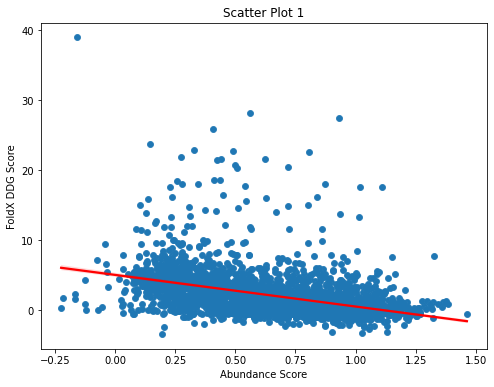

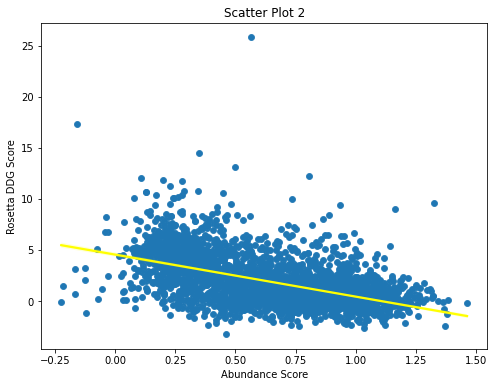

In [18]:
#create two scatter plots with trend lines for foldx & rosetta against score(abundance_score) using the specified parameters,

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Plot the first scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df2, x='score', y='foldx_ddg_score')
sns.regplot(data=merged_df2, x='score', y='foldx_ddg_score', line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Abundance Score')
plt.ylabel('FoldX DDG Score')
plt.title('Scatter Plot 1')

# Show the plot
plt.show()

# Plot the second scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df2, x='score', y='rosetta_ddg_score')
sns.regplot(data=merged_df2, x='score', y='rosetta_ddg_score', line_kws={'color': 'yellow'})

# Add labels and title
plt.xlabel('Abundance Score')
plt.ylabel('Rosetta DDG Score')
plt.title('Scatter Plot 2')

# Show the plot
plt.show()

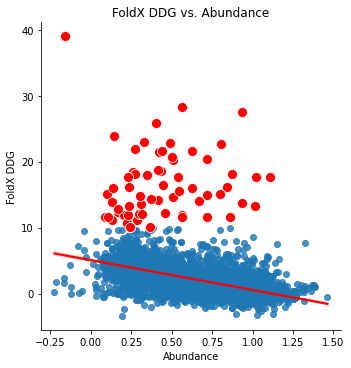

In [19]:
# Create a scatter plot with a trend line
sns.lmplot(data=merged_df2, x='score', y='foldx_ddg_score', line_kws={'color': 'red'})

# Add scatter points with different marker style for potential outliers
outliers = merged_df2[merged_df2['foldx_ddg_score'].abs() > 10]  # Adjust the outlier threshold as needed
sns.scatterplot(data=outliers, x='score', y='foldx_ddg_score', color='red', marker='o', s=100)

# Set plot title and axis labels
plt.title('FoldX DDG vs. Abundance')
plt.xlabel('Abundance')
plt.ylabel('FoldX DDG')

# Show the plot
plt.show()

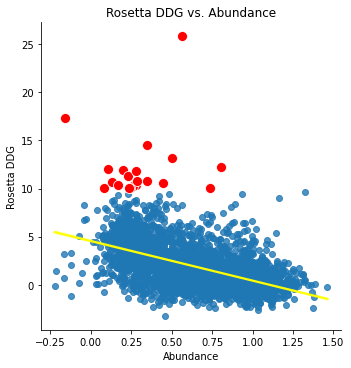

In [20]:
# Create a scatter plot with a trend line
sns.lmplot(data=merged_df2, x='score', y='rosetta_ddg_score', line_kws={'color': 'yellow'})

# Add scatter points with different marker style for potential outliers
outliers = merged_df2[merged_df2['rosetta_ddg_score'].abs() > 10]  # Adjust the outlier threshold as needed
sns.scatterplot(data=outliers, x='score', y='rosetta_ddg_score', color='red', marker='o', s=100)

# Set plot title and axis labels
plt.title('Rosetta DDG vs. Abundance')
plt.xlabel('Abundance')
plt.ylabel('Rosetta DDG')

# Show the plot
plt.show()

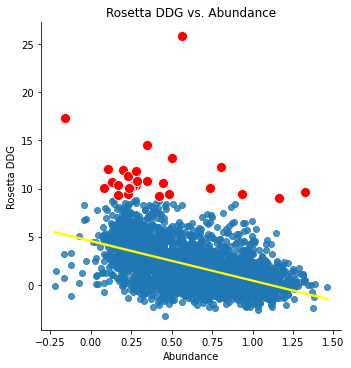

In [21]:
# Create a scatter plot with a trend line
sns.lmplot(data=merged_df2, x='score', y='rosetta_ddg_score', line_kws={'color': 'yellow'})

# Add scatter points with different marker style for potential outliers
outliers = merged_df2[merged_df2['rosetta_ddg_score'].abs() > 9]  # Adjust the outlier threshold as needed
sns.scatterplot(data=outliers, x='score', y='rosetta_ddg_score', color='red', marker='o', s=100)

# Set plot title and axis labels
plt.title('Rosetta DDG vs. Abundance')
plt.xlabel('Abundance')
plt.ylabel('Rosetta DDG')

# Show the plot
plt.show()

In [22]:
#What is the co-relation coefficient
import scipy.stats as stats

# Calculate the slope, intercept, and correlation coefficient
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df2['score'], merged_df2['foldx_ddg_score'])

# Calculate R-squared
r_squared = r_value**2

# Print R-squared
print(f"R-squared: {r_squared:.2f}")

R-squared: 0.19


In [23]:
import scipy.stats as stats

# Calculate the slope, intercept, and correlation coefficient
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df2['score'], merged_df2['rosetta_ddg_score'])

# Calculate R-squared
r_squared = r_value**2

# Print R-squared
print(f"R-squared: {r_squared:.2f}")

R-squared: 0.28


In this part i removed the outliers i.e. DDG values greater than 10.
Did linear plotting, obtained R2 and did some transformation to see if R2 can be improved with - 
1.foldx_ddg_score_squared
2.foldx_ddg_score_cubed
3.Box-Cox transformation of foldx_ddg_score

Major result is that R2 valued obtained for 1, 2 and 3 transformations above are 0.20, 0.12 and 0.25. With foldx_ddg_score untransfromed, 0.29 was obtained. 

Well, that was disappointing as it fell short of my hypothesis that there is an inverse relationship between stability and intracellular abundance. So i have to do more analysis of my data in part 3.

Identify the outliers with foldx_ddg_score greater than 10 and save them to a new DataFrame - there are 63 of them

In [24]:
# Filter the outliers based on foldx_ddg_score > 10
outliers = merged_df2[merged_df2['foldx_ddg_score'] > 10]

# Save the outliers to a new DataFrame
outliers_df = pd.DataFrame(outliers)

# Display the outliers DataFrame
outliers_df.head(2)

,variant,AA1_polarity,AA2_polarity,Envision_predictions,score,abundance_class,foldx_ddg_score,rosetta_ddg_score,pos,provean,sift,stride,foldx_ddg_class
189,L25W,Hydrophobic,Hydrophobic,0.821060,0.434919,1.0,18.62348,4.036897,25,-5.18,0.0,4,Destabilizing
190,L25Y,Hydrophobic,Hydrophobic,0.858066,0.934364,4.0,13.72800,3.476092,25,-4.32,0.0,4,Destabilizing


Do a similar operation wih respect to rosetta but ddg > 9

In [25]:
# Filter the outliers based on foldx_ddg_score > 9
outliers = merged_df2[merged_df2['rosetta_ddg_score'] > 9]

# Save the outliers to a new DataFrame
outliers_df = pd.DataFrame(outliers)

# Display the outliers DataFrame
outliers_df.head(2)

,variant,AA1_polarity,AA2_polarity,Envision_predictions,score,abundance_class,foldx_ddg_score,rosetta_ddg_score,pos,provean,sift,stride,foldx_ddg_class
314,F37P,Hydrophobic,Special,0.854736,1.163054,3.0,5.18162,9.038736,37,-9.32,0.000,3,Destabilizing
465,I50P,Hydrophobic,Special,0.854658,0.735186,3.0,2.65340,10.010115,50,-5.67,0.002,5,Destabilizing


Remove the outliers with foldx_ddg_score greater than 10 and calculate the R-squared value

R-squared: 0.2870593088754626


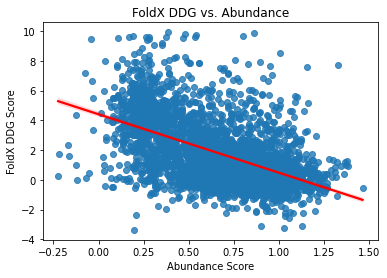

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Filter the outliers based on foldx_ddg_score > 10
filtered_df = merged_df2[merged_df2['foldx_ddg_score'] <= 10]

# Calculate R-squared value
X = filtered_df['score'].values.reshape(-1, 1)
y = filtered_df['foldx_ddg_score'].values
regressor = LinearRegression()
regressor.fit(X, y)
r_squared = regressor.score(X, y)

# Create a scatter plot with a trend line
sns.regplot(data=filtered_df, x='score', y='foldx_ddg_score', line_kws={'color': 'red'})

# Set plot title and axis labels
plt.title('FoldX DDG vs. Abundance')
plt.xlabel('Abundance Score')
plt.ylabel('FoldX DDG Score')

# Display the R-squared value
print('R-squared:', r_squared)

# Show the plot
plt.show()

Remove the outliers with rosetta_ddg_score greater than 9 and calculate the R-squared value

R-squared: 0.29860843170705087


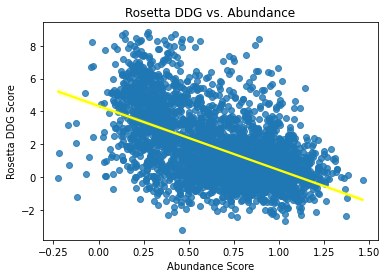

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Filter the outliers based on foldx_ddg_score > 9
filtered_df2 = merged_df2[merged_df2['rosetta_ddg_score'] <= 9]

# Calculate R-squared value
X = filtered_df2['score'].values.reshape(-1, 1)
y = filtered_df2['rosetta_ddg_score'].values
regressor = LinearRegression()
regressor.fit(X, y)
r_squared = regressor.score(X, y)

# Create a scatter plot with a trend line
sns.regplot(data=filtered_df2, x='score', y='rosetta_ddg_score', line_kws={'color': 'yellow'})

# Set plot title and axis labels
plt.title('Rosetta DDG vs. Abundance')
plt.xlabel('Abundance Score')
plt.ylabel('Rosetta DDG Score')

# Display the R-squared value
print('R-squared:', r_squared)

# Show the plot
plt.show()

An R-squared value of 0.29 indicates that approximately 29% of the variance in the dependent variable can be explained by the linear relationship with the independent variable(s). This means that around 71% of the variance is still unexplained by the linear model.

Typically, a higher R-squared value is desired to indicate a stronger linear relationship between the variables. However, the interpretation of whether a linear model can be assumed depends on the context and the specific requirements of the analysis. In some cases, an R-squared value of 0.29 may be considered acceptable, while in other cases, it may not.

It is also important to consider other factors such as the sample size, the nature of the data, and the specific research question being addressed. Additionally, it is useful to assess the residuals, check for any violations of the assumptions of linear regression, and explore alternative modeling techniques if necessary.

In conclusion, an R-squared value of 0.29 suggests a relatively weak linear relationship, but whether a linear model can be assumed depends on the specific context and requirements of the analysis.

Assuming the relationship is non linear we can implement something different
To model non-linear relationships between variables, we can consider using non-linear regression or other non-linear modeling techniques. Here are a few approaches commonly used:

Polynomial Regression
Generalized Additive Models (GAMs)
Splines: 
Non-linear Least Squares
Neural Networks
Decision Trees and Random Forests 

The choice of the appropriate technique depends on the nature of the data, the complexity of the relationship, and the specific goals of the analysis. It is often helpful to explore and compare different models, assess their performance, and select the one that best fits the data and provides meaningful insights.

However, we are limited by data size so will try simple mathematicals approaches
1.foldx_ddg_score_squared
2.foldx_ddg_score_cubed
3.Box-Cox transformation of foldx_ddg_score

Lets try the option of adding squared or cubed terms to foldx_ddg_score and calculate R2

In [28]:
import numpy as np
import statsmodels.api as sm

# Create new columns for squared and cubed terms
filtered_df['foldx_ddg_score_squared'] = filtered_df['foldx_ddg_score'] ** 2
filtered_df['foldx_ddg_score_cubed'] = filtered_df['foldx_ddg_score'] ** 3

# Define the predictors (including the original column and the squared/cubed terms)
X = filtered_df[['foldx_ddg_score', 'foldx_ddg_score_squared', 'foldx_ddg_score_cubed']]
y = filtered_df['score']

# Add a constant term to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Calculate R-squared
r_squared = results.rsquared
r_squared

/home/jeremiah/anaconda3/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex
/tmp/ipykernel_613753/2921227408.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['foldx_ddg_score_squared'] = filtered_df['foldx_ddg_score'] ** 2
/tmp/ipykernel_613753/2921227408.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

0.30844500961956645

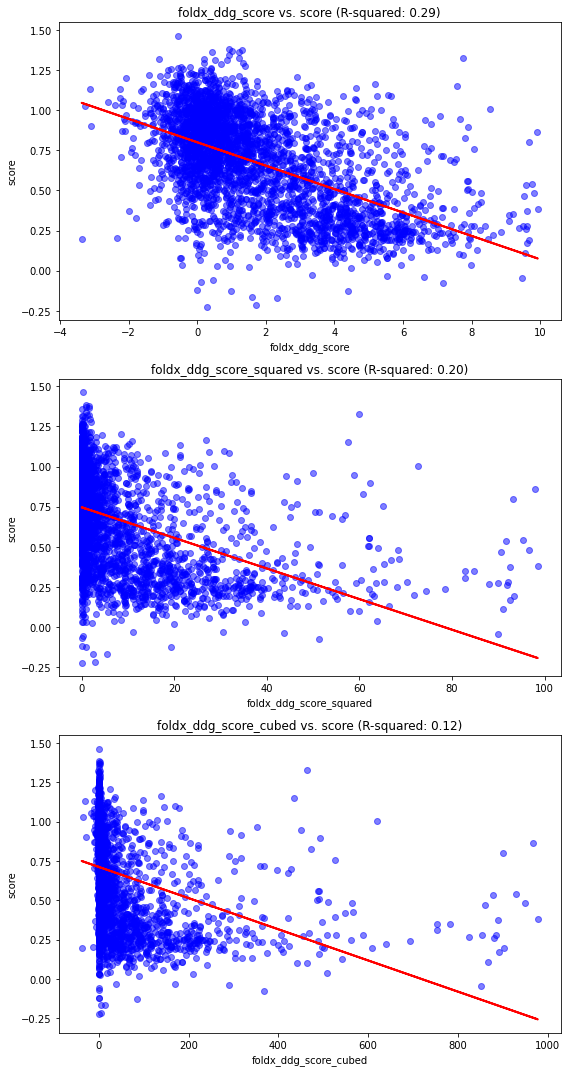

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming you have a DataFrame called 'df' with the columns 'abundance_score', 'foldx_ddg_score',
# 'foldx_ddg_score_squared', and 'foldx_ddg_score_cubed'

# Create scatter plots with trend lines
fig, axes = plt.subplots(nrows=3, figsize=(8, 15))

# Iterate over the columns and calculate R-squared
for i, col in enumerate(['foldx_ddg_score', 'foldx_ddg_score_squared', 'foldx_ddg_score_cubed']):
    # Extract the column data
    X = filtered_df[col].values.reshape(-1, 1)
    y = filtered_df['score'].values

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict the target variable
    y_pred = model.predict(X)

    # Calculate R-squared
    r2 = r2_score(y, y_pred)

    # Plot the scatter plot with trend line
    axes[i].scatter(X, y, color='blue', alpha=0.5)
    axes[i].plot(X, y_pred, color='red', linewidth=2)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('score')
    axes[i].set_title(f'{col} vs. score (R-squared: {r2:.2f})')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

Do the same for rosetta_ddg_score

In [30]:
import numpy as np
import statsmodels.api as sm

# Create new columns for squared and cubed terms
filtered_df2['rosetta_ddg_score_squared'] = filtered_df2['rosetta_ddg_score'] ** 2
filtered_df2['rosetta_ddg_score_cubed'] = filtered_df2['rosetta_ddg_score'] ** 3

# Define the predictors (including the original column and the squared/cubed terms)
X = filtered_df2[['rosetta_ddg_score', 'rosetta_ddg_score_squared', 'rosetta_ddg_score_cubed']]
y = filtered_df2['score']

# Add a constant term to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Calculate R-squared
r_squared = results.rsquared
r_squared

/tmp/ipykernel_613753/2076585234.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['rosetta_ddg_score_squared'] = filtered_df2['rosetta_ddg_score'] ** 2
/tmp/ipykernel_613753/2076585234.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['rosetta_ddg_score_cubed'] = filtered_df2['rosetta_ddg_score'] ** 3


0.3169701782388906

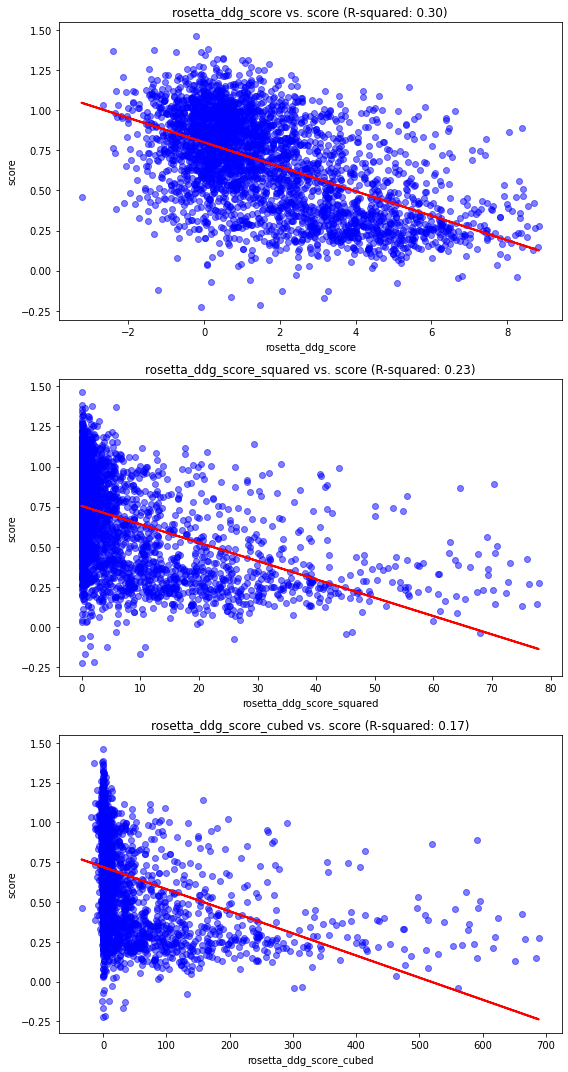

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming you have a DataFrame called 'df' with the columns 'abundance_score', 'foldx_ddg_score',
# 'foldx_ddg_score_squared', and 'foldx_ddg_score_cubed'

# Create scatter plots with trend lines
fig, axes = plt.subplots(nrows=3, figsize=(8, 15))

# Iterate over the columns and calculate R-squared
for i, col in enumerate(['rosetta_ddg_score', 'rosetta_ddg_score_squared', 'rosetta_ddg_score_cubed']):
    # Extract the column data
    X = filtered_df2[col].values.reshape(-1, 1)
    y = filtered_df2['score'].values

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict the target variable
    y_pred = model.predict(X)

    # Calculate R-squared
    r2 = r2_score(y, y_pred)

    # Plot the scatter plot with trend line
    axes[i].scatter(X, y, color='blue', alpha=0.5)
    axes[i].plot(X, y_pred, color='red', linewidth=2)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('score')
    axes[i].set_title(f'{col} vs. score (R-squared: {r2:.2f})')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

convert the values in the foldx_ddg_score column of the filtered_df DataFrame to their absolute values and perform a Box-Cox transformation

In [32]:
import numpy as np
import pandas as pd
from scipy import stats

# Convert foldx_ddg_score to absolute values
filtered_df['foldx_ddg_score'] = filtered_df['foldx_ddg_score'].abs()

# Perform Box-Cox transformation
transformed_data, best_lambda = stats.boxcox(filtered_df['foldx_ddg_score'])

# Add the transformed data as a new column
filtered_df['foldx_ddg_score_boxcox'] = transformed_data

# Print the best lambda value
print('Best Lambda:', best_lambda)

Best Lambda: 0.24083255280483554


/tmp/ipykernel_613753/2028044998.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['foldx_ddg_score'] = filtered_df['foldx_ddg_score'].abs()
/tmp/ipykernel_613753/2028044998.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['foldx_ddg_score_boxcox'] = transformed_data


R-squared: 0.25037105238730806


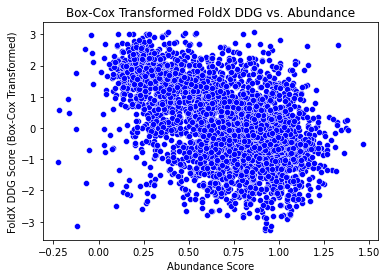

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats

# Calculate R-squared
regression_model = LinearRegression()
X = filtered_df['score'].values.reshape(-1, 1)
y = filtered_df['foldx_ddg_score_boxcox']
regression_model.fit(X, y)
r_squared = regression_model.score(X, y)
print('R-squared:', r_squared)

# Plot the Box-Cox transformed data
sns.scatterplot(data=filtered_df, x='score', y='foldx_ddg_score_boxcox', color='blue')
plt.title('Box-Cox Transformed FoldX DDG vs. Abundance')
plt.xlabel('Abundance Score')
plt.ylabel('FoldX DDG Score (Box-Cox Transformed)')
plt.show()

The major achievement in this next part is seeing that the distribution of abundace score follow a bimodal distribution after normalizing it. A bimodal distribution indicates that the data has two distinct peaks or modes.

What does that say about the data? Here are four things statistics tells us

It suggests the presence of two separate groups or subpopulations within the data. This can be useful in various data analysis scenarios, as it may indicate the existence of different underlying processes or phenomena.

The presence of multiple modes in a distribution can provide insights and help in decision-making. It may suggest the need for separate analysis or modeling for each mode or subgroup. For example, in the context of abundance scores, a bimodal distribution could imply the presence of two distinct levels of abundance or two distinct populations with different levels of abundance.

Identifying and interpreting bimodal distributions can guide further analysis, such as investigating the characteristics and differences between the two modes, examining factors that may contribute to the separation, or exploring potential relationships with other variables.

Hypothesis Testing: I performed statistical tests to determine if the two modes are significantly different from each other. I used t-test or Mann-Whitney U test to compare the means and medians of the two modes.

Since none of the statistical test gave was significant i move to testing my earlier hypothesis in a different way. I made a scatter plot and identified the first group of instances that i expected to confirm to my hypothesis i.e. when foldx score is > 2.5 and abundance score is less than 0.4. The cut-off for the abundance score was based on the bimodal plot. Hypothetically these instances should be variant that are destabilizing and so should have low abundance. I made a similar, but in the opposite direction, cut for variants with foldx score < 2.5 and abundnace score > than 0.4. We expect these variants to be the "wild-type" variants - not unstable and full abundance.

In [34]:
# Calculate the normalized abundance score
normalized_abundance_score = (filtered_df['score'] - filtered_df['score'].min()) / (filtered_df['score'].max() - filtered_df['score'].min())

# Assign the normalized abundance score to a new column
filtered_df['normalized_abundance_score'] = normalized_abundance_score
filtered_df.head(2)

/tmp/ipykernel_613753/1736592866.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['normalized_abundance_score'] = normalized_abundance_score


,variant,AA1_polarity,AA2_polarity,Envision_predictions,score,abundance_class,foldx_ddg_score,rosetta_ddg_score,pos,provean,sift,stride,foldx_ddg_class,foldx_ddg_score_squared,foldx_ddg_score_cubed,foldx_ddg_score_boxcox,normalized_abundance_score
0,R14A,PositiveCharge,Hydrophobic,0.900204,1.087552,4.0,0.44196,0.056322,14,-3.86,0.094,1,Wild-type,0.195329,0.086327,-0.741264,0.777644
1,R14D,PositiveCharge,negativeCharge,0.812311,1.142873,4.0,0.64817,0.803333,14,-4.61,0.016,1,Wild-type,0.420124,0.272312,-0.411731,0.810458


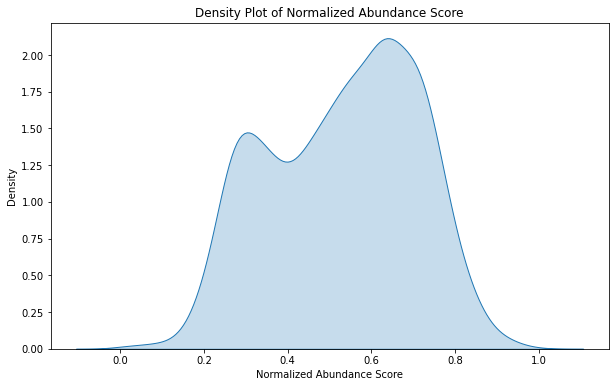

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=filtered_df, x='normalized_abundance_score', fill=True)

# Set plot title and axis labels
plt.title('Density Plot of Normalized Abundance Score')
plt.xlabel('Normalized Abundance Score')
plt.ylabel('Density')

# Show the plot
plt.show()

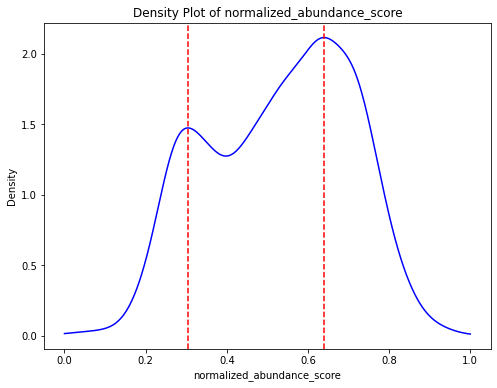

Maximum values: [0.3043043  0.63963964]


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.signal import find_peaks

# Extract the values from the 'normalized_abundance_score' column
data = filtered_df['normalized_abundance_score'].values

# Fit a kernel density estimate (KDE) to the data
kde = gaussian_kde(data)

# Find the maximum values by locating the peaks of the KDE
x = np.linspace(data.min(), data.max(), 1000)
y = kde(x)
peaks, _ = find_peaks(y)

# Get the x-values (maximum values) corresponding to the peaks
max_values = x[peaks]

# Plot the density plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, color='blue')
plt.xlabel('normalized_abundance_score')
plt.ylabel('Density')
plt.title('Density Plot of normalized_abundance_score')

# Add vertical lines at the maximum values
for value in max_values:
    plt.axvline(value, color='red', linestyle='--')

# Show the plot
plt.show()

# Print the maximum values
print("Maximum values:", max_values)

In [37]:
#try same for ddg
# Calculate the normalized abundance score
normalized_foldx_ddg_score = (filtered_df['foldx_ddg_score'] - filtered_df['foldx_ddg_score'].min()) / (filtered_df['foldx_ddg_score'].max() - filtered_df['foldx_ddg_score'].min())

# Assign the normalized abundance score to a new column
filtered_df['normalized_foldx_ddg_score'] = normalized_foldx_ddg_score
filtered_df.head(2)

/tmp/ipykernel_613753/1487470192.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['normalized_foldx_ddg_score'] = normalized_foldx_ddg_score


,variant,AA1_polarity,AA2_polarity,Envision_predictions,score,abundance_class,foldx_ddg_score,rosetta_ddg_score,pos,provean,sift,stride,foldx_ddg_class,foldx_ddg_score_squared,foldx_ddg_score_cubed,foldx_ddg_score_boxcox,normalized_abundance_score,normalized_foldx_ddg_score
0,R14A,PositiveCharge,Hydrophobic,0.900204,1.087552,4.0,0.44196,0.056322,14,-3.86,0.094,1,Wild-type,0.195329,0.086327,-0.741264,0.777644,0.044363
1,R14D,PositiveCharge,negativeCharge,0.812311,1.142873,4.0,0.64817,0.803333,14,-4.61,0.016,1,Wild-type,0.420124,0.272312,-0.411731,0.810458,0.065140


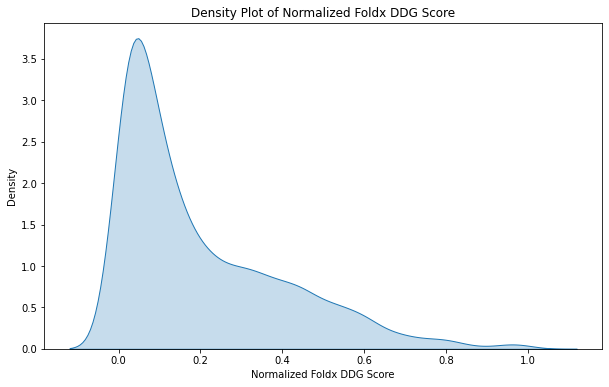

In [38]:
# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=filtered_df, x='normalized_foldx_ddg_score', fill=True)

# Set plot title and axis labels
plt.title('Density Plot of Normalized Foldx DDG Score')
plt.xlabel('Normalized Foldx DDG Score')
plt.ylabel('Density')

# Show the plot
plt.show()

To investigate the characteristics and differences between the two modes in the bimodal distribution of the normalized abundance score, we can perform several analyses:

Descriptive Statistics: Calculate summary statistics for each mode separately. This includes measures like mean, median, standard deviation, and range. Compare these statistics between the two modes to identify any notable differences.

Data Visualization: Create separate histograms or density plots for each mode to visualize their distributions. This will help you observe the shape, spread, and location of each mode. Additionally, you can overlay the density plots to compare the shapes of the two modes.

Hypothesis Testing: Perform statistical tests to determine if the two modes are significantly different from each other. For example, you can use a t-test or Mann-Whitney U test to compare the means or medians of the two modes. The choice of the test depends on the distributional assumptions and characteristics of your data.

Clustering Analysis: Apply clustering algorithms, such as k-means clustering or Gaussian mixture models, to identify and separate the two modes automatically. This can provide insights into the characteristics and differences between the two groups, including their centroids, cluster sizes, and other cluster-specific properties.

Feature Analysis: Explore other variables or features in your dataset to understand their relationships with the two modes. For example, you can compare the distributions of other variables between the two modes using box plots or violin plots. This can help identify potential factors associated with the differences in abundance levels.
By performing these analyses, you can gain a deeper understanding of the characteristics and differences between the two modes in the bimodal distribution of the normalized abundance score.

In [39]:
import numpy as np
import pandas as pd
from scipy import stats

# Assuming you have a DataFrame called 'df' with the 'normalized_abundance_score' column

# Step 1: Identify the two modes
# You can use the previously obtained bimodal cutoff points or ranges

cutoff_point = 0.6  # Example cutoff point for separation

# Step 2: Split the data
mode_1_data = filtered_df[filtered_df['normalized_abundance_score'] <= cutoff_point]
mode_2_data = filtered_df[filtered_df['normalized_abundance_score'] > cutoff_point]

# Step 3: Calculate statistics for each mode
mode_1_mean = np.mean(mode_1_data['normalized_abundance_score'])
mode_1_median = np.median(mode_1_data['normalized_abundance_score'])
mode_1_std = np.std(mode_1_data['normalized_abundance_score'])
mode_1_range = np.ptp(mode_1_data['normalized_abundance_score'])

mode_2_mean = np.mean(mode_2_data['normalized_abundance_score'])
mode_2_median = np.median(mode_2_data['normalized_abundance_score'])
mode_2_std = np.std(mode_2_data['normalized_abundance_score'])
mode_2_range = np.ptp(mode_2_data['normalized_abundance_score'])

# Step 4: Compare statistics
print("Mode 1 Statistics:")
print(f"Mean: {mode_1_mean}")
print(f"Median: {mode_1_median}")
print(f"Standard Deviation: {mode_1_std}")
print(f"Range: {mode_1_range}")

print("\nMode 2 Statistics:")
print(f"Mean: {mode_2_mean}")
print(f"Median: {mode_2_median}")
print(f"Standard Deviation: {mode_2_std}")
print(f"Range: {mode_2_range}")

# Step 5: Perform statistical testing (optional)
# You can perform additional statistical tests to assess the significance of differences
# For example, you can use a t-test or Mann-Whitney U test
p_value = stats.ttest_ind(mode_1_data['normalized_abundance_score'], mode_2_data['normalized_abundance_score']).pvalue
print(f"\nT-Test p-value: {p_value}")

Mode 1 Statistics:
Mean: 0.41100831032175456
Median: 0.42125585981561736
Standard Deviation: 0.12103954174619101
Range: 0.5999522543695133

Mode 2 Statistics:
Mean: 0.7028008699041611
Median: 0.6962035334614121
Standard Deviation: 0.07043397130253203
Range: 0.399907349758157

T-Test p-value: 0.0


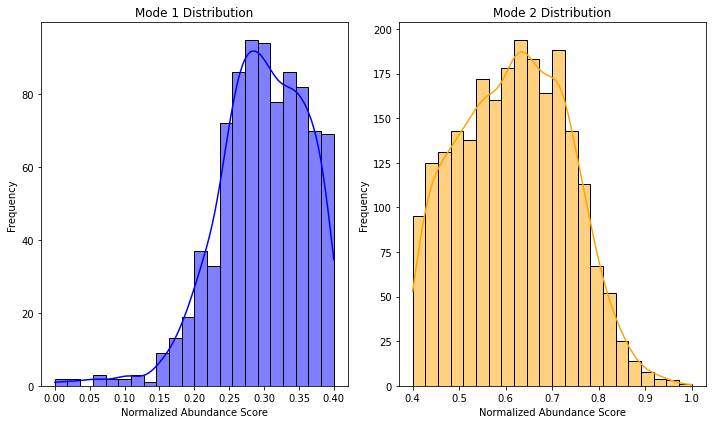

In [40]:
#step 2: Data visualization

# DataFrame 'filtered_df' with the 'normalized_abundance_score' column

# Step 1: Identify the two modes
# You can use the previously obtained bimodal cutoff points or ranges

cutoff_point = 0.4  #cutoff point for separation

# Step 2: Split the data
mode_1_data = filtered_df[filtered_df['normalized_abundance_score'] <= cutoff_point]
mode_2_data = filtered_df[filtered_df['normalized_abundance_score'] > cutoff_point]

# Step 3: Create separate histograms for each mode
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)  # Subplot for Mode 1
sns.histplot(mode_1_data['normalized_abundance_score'], kde=True, color='blue')
plt.title('Mode 1 Distribution')
plt.xlabel('Normalized Abundance Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)  # Subplot for Mode 2
sns.histplot(mode_2_data['normalized_abundance_score'], kde=True, color='orange')
plt.title('Mode 2 Distribution')
plt.xlabel('Normalized Abundance Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [41]:
# Perform t-test for means
t_statistic, p_value = stats.ttest_ind(mode_1_data['normalized_abundance_score'], mode_2_data['normalized_abundance_score'])
print("T-Test (Means):")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")
print()

# Perform Mann-Whitney U test for medians
u_statistic, p_value = stats.mannwhitneyu(mode_1_data['normalized_abundance_score'], mode_2_data['normalized_abundance_score'])
print("Mann-Whitney U Test (Medians):")
print(f"U-Statistic: {u_statistic}")
print(f"P-Value: {p_value}")

T-Test (Means):
T-Statistic: -76.4983193523254
P-Value: 0.0

Mann-Whitney U Test (Medians):
U-Statistic: 0.0
P-Value: 0.0


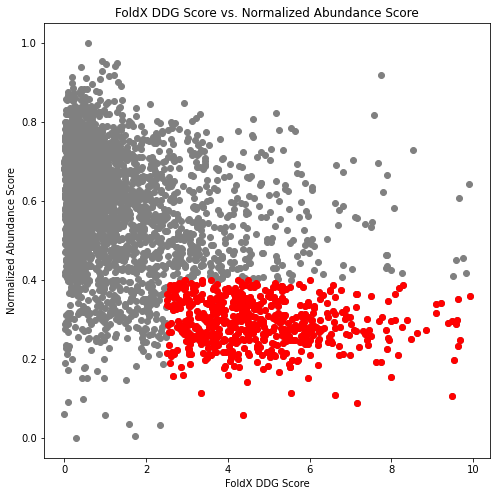

In [42]:
plt.figure(figsize=(8, 8))

# Plot all data points in gray color
plt.scatter(filtered_df['foldx_ddg_score'], filtered_df['normalized_abundance_score'], color='gray')

# Plot instances with foldx_ddg_score > 2.5 and normalized_abundance_score < 0.4 in a different color
selected_points = filtered_df[(filtered_df['foldx_ddg_score'] > 2.5) & (filtered_df['normalized_abundance_score'] < 0.4)]
plt.scatter(selected_points['foldx_ddg_score'], selected_points['normalized_abundance_score'], color='red')

# Set plot title and axis labels
plt.title('FoldX DDG Score vs. Normalized Abundance Score')
plt.xlabel('FoldX DDG Score')
plt.ylabel('Normalized Abundance Score')

# Show the plot
plt.show()

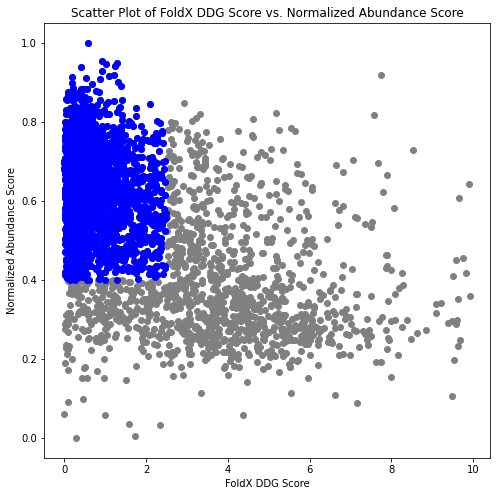

In [43]:
plt.figure(figsize=(8, 8))

# Plot all data points in gray color
plt.scatter(filtered_df['foldx_ddg_score'], filtered_df['normalized_abundance_score'], color='gray')

# Plot instances with foldx_ddg_score > 2.5 and normalized_abundance_score < 0.4 in magenta
selected_points = filtered_df[(filtered_df['foldx_ddg_score'] < 2.5) & (filtered_df['normalized_abundance_score'] > 0.4)]
plt.scatter(selected_points['foldx_ddg_score'], selected_points['normalized_abundance_score'], color='blue')

# Set plot title and axis labels
plt.title('Scatter Plot of FoldX DDG Score vs. Normalized Abundance Score')
plt.xlabel('FoldX DDG Score')
plt.ylabel('Normalized Abundance Score')

# Show the plot
plt.show()

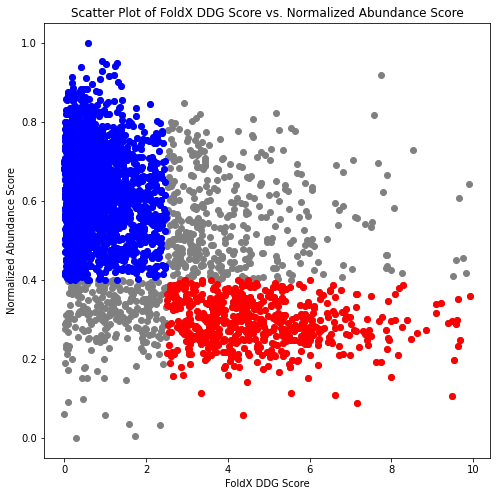

In [44]:
plt.figure(figsize=(8, 8))

# Plot all data points in gray color
plt.scatter(filtered_df['foldx_ddg_score'], filtered_df['normalized_abundance_score'], color='gray')

# Plot instances with foldx_ddg_score > 2.5 and normalized_abundance_score < 0.4 in red
selected_points1 = filtered_df[(filtered_df['foldx_ddg_score'] > 2.5) & (filtered_df['normalized_abundance_score'] < 0.4)]
plt.scatter(selected_points1['foldx_ddg_score'], selected_points1['normalized_abundance_score'], color='red')

# Plot instances with foldx_ddg_score < 2.5 and normalized_abundance_score > 0.4 in blue
selected_points2 = filtered_df[(filtered_df['foldx_ddg_score'] < 2.5) & (filtered_df['normalized_abundance_score'] > 0.4)]
plt.scatter(selected_points2['foldx_ddg_score'], selected_points2['normalized_abundance_score'], color='blue')

# Set plot title and axis labels
plt.title('Scatter Plot of FoldX DDG Score vs. Normalized Abundance Score')
plt.xlabel('FoldX DDG Score')
plt.ylabel('Normalized Abundance Score')

# Show the plot
plt.show()

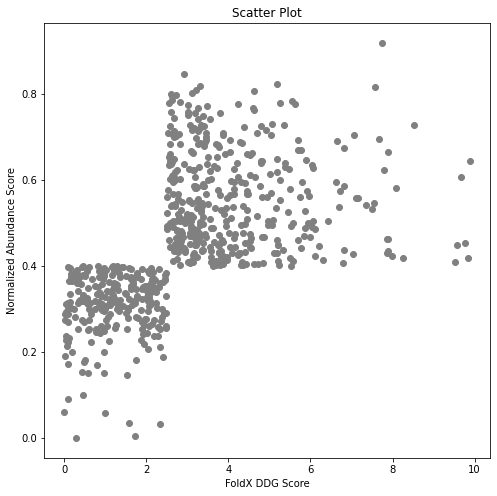

In [45]:
plt.figure(figsize=(8, 8))

# Select instances that do not satisfy either condition
filtered_instances = filtered_df[~((filtered_df['foldx_ddg_score'] > 2.5) & (filtered_df['normalized_abundance_score'] < 0.4)) &
                        ~((filtered_df['foldx_ddg_score'] < 2.5) & (filtered_df['normalized_abundance_score'] > 0.4))]

# Create scatter plot
plt.scatter(filtered_instances['foldx_ddg_score'], filtered_instances['normalized_abundance_score'], color='gray')

# Set plot title and axis labels
plt.title('Scatter Plot')
plt.xlabel('FoldX DDG Score')
plt.ylabel('Normalized Abundance Score')

# Show the plot
plt.show()

/home/jeremiah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


R-squared: 0.5567095913985423


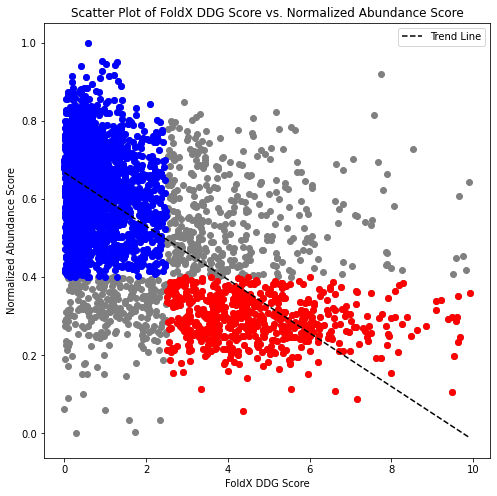

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(8, 8))

# Plot all data points in gray color
plt.scatter(filtered_df['foldx_ddg_score'], filtered_df['normalized_abundance_score'], color='gray')

# Plot instances with foldx_ddg_score > 2.5 and normalized_abundance_score < 0.4 in red
selected_points1 = filtered_df[(filtered_df['foldx_ddg_score'] > 2.5) & (filtered_df['normalized_abundance_score'] < 0.4)]
plt.scatter(selected_points1['foldx_ddg_score'], selected_points1['normalized_abundance_score'], color='red')

# Plot instances with foldx_ddg_score < 2.5 and normalized_abundance_score > 0.4 in blue
selected_points2 = filtered_df[(filtered_df['foldx_ddg_score'] < 2.5) & (filtered_df['normalized_abundance_score'] > 0.4)]
plt.scatter(selected_points2['foldx_ddg_score'], selected_points2['normalized_abundance_score'], color='blue')

# Concatenate the selected points
selected_points = pd.concat([selected_points1, selected_points2])

# Perform linear regression
regression_model = LinearRegression()
regression_model.fit(selected_points[['foldx_ddg_score']], selected_points['normalized_abundance_score'])

# Generate predictions using the linear regression model
x_vals = np.linspace(filtered_df['foldx_ddg_score'].min(), filtered_df['foldx_ddg_score'].max(), 100)
y_vals = regression_model.predict(x_vals.reshape(-1, 1))

# Calculate R-squared
r_squared = regression_model.score(selected_points[['foldx_ddg_score']], selected_points['normalized_abundance_score'])
print('R-squared:', r_squared)

# Plot the trend line
plt.plot(x_vals, y_vals, color='black', linestyle='--', label='Trend Line')

# Set plot title and axis labels
plt.title('Scatter Plot of FoldX DDG Score vs. Normalized Abundance Score')
plt.xlabel('FoldX DDG Score')
plt.ylabel('Normalized Abundance Score')

# Show legend
plt.legend()

# Show the plot
plt.show()

/home/jeremiah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


R-squared: 0.513639455801469


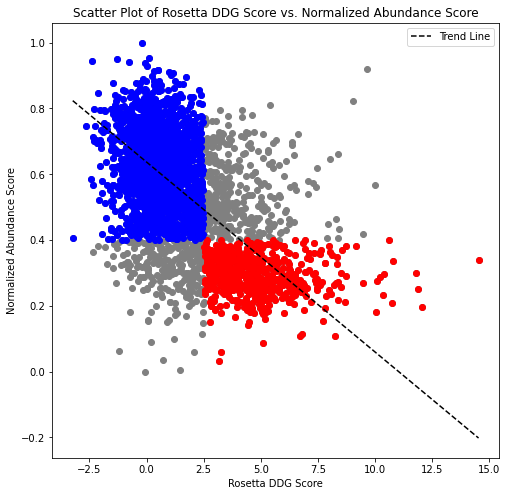

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(8, 8))

# Plot all data points in gray color
plt.scatter(filtered_df['rosetta_ddg_score'], filtered_df['normalized_abundance_score'], color='gray')

# Plot instances with foldx_ddg_score > 2.5 and normalized_abundance_score < 0.4 in red
selected_points1 = filtered_df[(filtered_df['rosetta_ddg_score'] > 2.5) & (filtered_df['normalized_abundance_score'] < 0.4)]
plt.scatter(selected_points1['rosetta_ddg_score'], selected_points1['normalized_abundance_score'], color='red')

# Plot instances with foldx_ddg_score < 2.5 and normalized_abundance_score > 0.4 in blue
selected_points2 = filtered_df[(filtered_df['rosetta_ddg_score'] < 2.5) & (filtered_df['normalized_abundance_score'] > 0.4)]
plt.scatter(selected_points2['rosetta_ddg_score'], selected_points2['normalized_abundance_score'], color='blue')

# Concatenate the selected points
selected_points = pd.concat([selected_points1, selected_points2])

# Perform linear regression
regression_model = LinearRegression()
regression_model.fit(selected_points[['rosetta_ddg_score']], selected_points['normalized_abundance_score'])

# Generate predictions using the linear regression model
x_vals = np.linspace(filtered_df['rosetta_ddg_score'].min(), filtered_df['rosetta_ddg_score'].max(), 100)
y_vals = regression_model.predict(x_vals.reshape(-1, 1))

# Calculate R-squared
r_squared = regression_model.score(selected_points[['rosetta_ddg_score']], selected_points['normalized_abundance_score'])
print('R-squared:', r_squared)

# Plot the trend line
plt.plot(x_vals, y_vals, color='black', linestyle='--', label='Trend Line')

# Set plot title and axis labels
plt.title('Scatter Plot of Rosetta DDG Score vs. Normalized Abundance Score')
plt.xlabel('Rosetta DDG Score')
plt.ylabel('Normalized Abundance Score')

# Show legend
plt.legend()

# Show the plot
plt.show()

R-squared: 0.31931958692458595


/home/jeremiah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


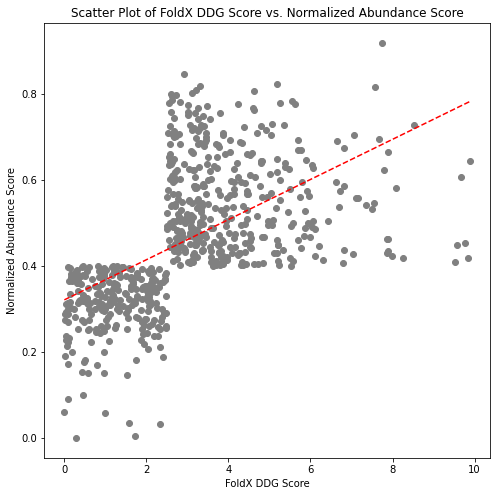

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(8, 8))

# Filter the data based on conditions
filtered_df = filtered_df[~((filtered_df['foldx_ddg_score'] > 2.5) & (filtered_df['normalized_abundance_score'] < 0.4)) & 
                          ~((filtered_df['foldx_ddg_score'] < 2.5) & (filtered_df['normalized_abundance_score'] > 0.4))]

# Plot the filtered data
plt.scatter(filtered_df['foldx_ddg_score'], filtered_df['normalized_abundance_score'], color='gray')

# Perform linear regression
regression_model = LinearRegression()
regression_model.fit(filtered_df[['foldx_ddg_score']], filtered_df['normalized_abundance_score'])

# Generate predictions using the linear regression model
x_vals = np.linspace(filtered_df['foldx_ddg_score'].min(), filtered_df['foldx_ddg_score'].max(), 100)
y_vals = regression_model.predict(x_vals.reshape(-1, 1))

# Plot the trend line
plt.plot(x_vals, y_vals, color='red', linestyle='--', label='Trend Line')

# Calculate R-squared
r_squared = regression_model.score(filtered_df[['foldx_ddg_score']], filtered_df['normalized_abundance_score'])
print(f"R-squared: {r_squared}")

# Set plot title and axis labels
plt.title('Scatter Plot of FoldX DDG Score vs. Normalized Abundance Score')
plt.xlabel('FoldX DDG Score')
plt.ylabel('Normalized Abundance Score')

# Show the plot
plt.show()

R-squared: 0.3798676873643465


/home/jeremiah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


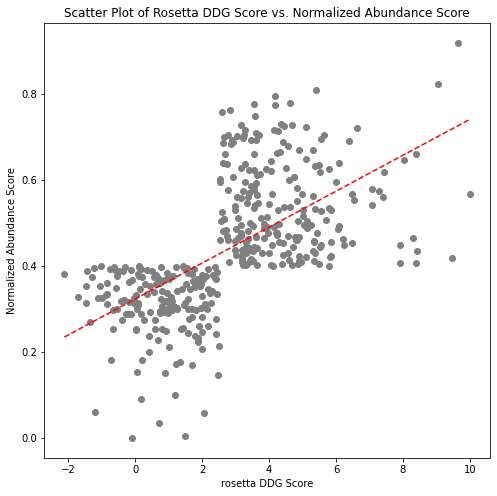

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(8, 8))

# Filter the data based on conditions
filtered_df = filtered_df[~((filtered_df['rosetta_ddg_score'] > 2.5) & (filtered_df['normalized_abundance_score'] < 0.4)) & 
                          ~((filtered_df['rosetta_ddg_score'] < 2.5) & (filtered_df['normalized_abundance_score'] > 0.4))]

# Plot the filtered data
plt.scatter(filtered_df['rosetta_ddg_score'], filtered_df['normalized_abundance_score'], color='gray')

# Perform linear regression
regression_model = LinearRegression()
regression_model.fit(filtered_df[['rosetta_ddg_score']], filtered_df['normalized_abundance_score'])

# Generate predictions using the linear regression model
x_vals = np.linspace(filtered_df['rosetta_ddg_score'].min(), filtered_df['rosetta_ddg_score'].max(), 100)
y_vals = regression_model.predict(x_vals.reshape(-1, 1))

# Plot the trend line
plt.plot(x_vals, y_vals, color='red', linestyle='--', label='Trend Line')

# Calculate R-squared
r_squared = regression_model.score(filtered_df[['rosetta_ddg_score']], filtered_df['normalized_abundance_score'])
print(f"R-squared: {r_squared}")

# Set plot title and axis labels
plt.title('Scatter Plot of Rosetta DDG Score vs. Normalized Abundance Score')
plt.xlabel('rosetta DDG Score')
plt.ylabel('Normalized Abundance Score')

# Show the plot
plt.show()